In [1]:
import os
import pandas as pd
import numpy as np
import math
from matplotlib.pyplot import *
import matplotlib.pyplot as plt
from matplotlib import animation
from matplotlib import cm
from parse import *
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier as RandomForest
import random
from sklearn import linear_model
from datetime import datetime
import gc

pd.set_option("display.max_columns", 2000)


In [2]:
CHUNKSIZE = 100000

TRAIN_DATE        = "train_date.csv"
TRAIN_NUMERIC     = "train_numeric.csv"
TRAIN_CATEGORICAL = "train_categorical.csv"
TEST_DATE         = "test_date.csv"
TEST_NUMERIC      = "test_numeric.csv"
TEST_CATEGORICAL  = "test_categorical.csv"

SEED = 0
CHUNKSIZE = 50000
NROWS = 1200000

ID_COLUMN = 'Id'
TARGET_COLUMN = 'Response'
 

In [4]:
CHUNK_SIZE = 10000

start = datetime.now()

reader_date = pd.read_csv("../train_date.csv",chunksize=CHUNK_SIZE, dtype=np.float32)
reader_num = pd.read_csv("../train_numeric.csv",chunksize=CHUNK_SIZE, dtype=np.float32)

#分割して読み込み
loop = 0
cnt_0 = 0
cnt_1 = 0
for df_chunk_date in reader_date:
    df_chunk_num = reader_num.get_chunk(CHUNK_SIZE)
    
    df_chunk = pd.merge(on="Id", left=df_chunk_date, right=df_chunk_num)
    ## 多数側データをアンダーサンプリング
    df_0 = df_chunk[df_chunk['Response'] == 0]
    df_1 = df_chunk[df_chunk['Response'] == 1]
    cnt_0 = cnt_0 + len(df_0.index)
    cnt_1 = cnt_1 + len(df_0.index)
    df_0 = df_0.sample(n = len(df_1.index) * 20, axis=0, random_state=1)
    if loop == 0:
        df = pd.concat([df_0, df_1])
    else:
        df = pd.concat([df, df_0, df_1])
    
    print("loop : {} / Rows = {}".format(loop, len(df.index)))

    loop = loop + 1
    
print("0:{}, 1:{}".format(cnt_0, cnt_1))
print("{} -> {}".format(start, datetime.now()))
print("Memory:{}".format(df.memory_usage(index=True).sum()))

loop : 0 / Rows = 1113
loop : 1 / Rows = 2352
loop : 2 / Rows = 3549
loop : 3 / Rows = 4599
loop : 4 / Rows = 5691
loop : 5 / Rows = 6783
loop : 6 / Rows = 8064
loop : 7 / Rows = 9303
loop : 8 / Rows = 10794
loop : 9 / Rows = 11928
loop : 10 / Rows = 13167
loop : 11 / Rows = 14280
loop : 12 / Rows = 15078
loop : 13 / Rows = 16380
loop : 14 / Rows = 17535
loop : 15 / Rows = 18543
loop : 16 / Rows = 20118
loop : 17 / Rows = 21546
loop : 18 / Rows = 22617
loop : 19 / Rows = 23709
loop : 20 / Rows = 24864
loop : 21 / Rows = 25809
loop : 22 / Rows = 26670
loop : 23 / Rows = 27825
loop : 24 / Rows = 29610
loop : 25 / Rows = 30744
loop : 26 / Rows = 31899
loop : 27 / Rows = 33348
loop : 28 / Rows = 34566
loop : 29 / Rows = 35595
loop : 30 / Rows = 36876
loop : 31 / Rows = 38262
loop : 32 / Rows = 39501
loop : 33 / Rows = 40803
loop : 34 / Rows = 42021
loop : 35 / Rows = 43596
loop : 36 / Rows = 44625
loop : 37 / Rows = 45822
loop : 38 / Rows = 47334
loop : 39 / Rows = 48636
loop : 40 / Rows =

In [5]:
df.head()

Id     L0_S0_D1     L0_S0_D3     L0_S0_D5     L0_S0_D7     L0_S0_D9  \
0   4.0    82.239998    82.239998    82.239998    82.239998    82.239998   
1   6.0          NaN          NaN          NaN          NaN          NaN   
2   7.0  1618.699951  1618.699951  1618.699951  1618.699951  1618.699951   
3   9.0  1149.199951  1149.199951  1149.199951  1149.199951  1149.199951   
4  11.0   602.640015   602.640015   602.640015   602.640015   602.640015   

     L0_S0_D11    L0_S0_D13    L0_S0_D15    L0_S0_D17    L0_S0_D19  \
0    82.239998    82.239998    82.239998    82.239998    82.239998   
1          NaN          NaN          NaN          NaN          NaN   
2  1618.699951  1618.699951  1618.699951  1618.699951  1618.699951   
3  1149.199951  1149.199951  1149.199951  1149.199951  1149.199951   
4   602.640015   602.640015   602.640015   602.640015   602.640015   

     L0_S0_D21    L0_S0_D23    L0_S1_D26    L0_S1_D30    L0_S2_D34  \
0    82.239998    82.239998    82.239998    82.239998    82.239998   
1          NaN          NaN          NaN          NaN          NaN   
2  1618.699951  1618.699951  1618.699951  1618.699951  1618.699951   
3  1149.199951  1149.199951  1149.199951  1149.199951  1149.209961   
4   602.640015   602.640015   602.640015   602.640015          NaN   

     L0_S2_D38    L0_S2_D42    L0_S2_D46    L0_S2_D50    L0_S2_D54  \
0    82.239998    82.239998    82.239998    82.239998    82.239998   
1          NaN          NaN          NaN          NaN          NaN   
2  1618.699951  1618.699951  1618.699951  1618.699951  1618.699951   
3  1149.209961  1149.209961  1149.209961  1149.209961  1149.209961   
4          NaN          NaN          NaN          NaN          NaN   

     L0_S2_D58    L0_S2_D62    L0_S2_D66   L0_S3_D70   L0_S3_D74   L0_S3_D78  \
0    82.239998    82.239998    82.239998         NaN         NaN         NaN   
1          NaN          NaN          NaN         NaN         NaN         NaN   
2  1618.699951  1618.699951  1618.699951         NaN         NaN         NaN   
3  1149.209961  1149.209961  1149.209961         NaN         NaN         NaN   
4          NaN          NaN          NaN  602.640015  602.640015  602.640015   

    L0_S3_D82   L0_S3_D86   L0_S3_D90   L0_S3_D94   L0_S3_D98  L0_S3_D102  \
0         NaN         NaN         NaN         NaN         NaN         NaN   
1         NaN         NaN         NaN         NaN         NaN         NaN   
2         NaN         NaN         NaN         NaN         NaN         NaN   
3         NaN         NaN         NaN         NaN         NaN         NaN   
4  602.640015  602.640015  602.640015  602.640015  602.640015  602.640015   

    L0_S4_D106   L0_S4_D111   L0_S5_D115   L0_S5_D117   L0_S6_D120  \
0    82.260002    82.260002          NaN          NaN          NaN   
1          NaN          NaN          NaN          NaN          NaN   
2          NaN          NaN  1618.719971  1618.719971  1618.719971   
3  1149.219971  1149.219971          NaN          NaN          NaN   
4   602.659973   602.659973          NaN          NaN          NaN   

    L0_S6_D124   L0_S6_D127   L0_S6_D130   L0_S6_D134   L0_S7_D137  \
0          NaN          NaN          NaN          NaN    82.260002   
1          NaN          NaN          NaN          NaN          NaN   
2  1618.719971  1618.719971  1618.719971  1618.719971          NaN   
3          NaN          NaN          NaN          NaN  1149.219971   
4          NaN          NaN          NaN          NaN   602.669983   

    L0_S7_D139   L0_S7_D140   L0_S7_D141   L0_S7_D143   L0_S8_D145  \
0    82.260002    82.260002    82.260002    82.260002    82.269997   
1          NaN          NaN          NaN          NaN          NaN   
2          NaN          NaN          NaN          NaN  1618.729980   
3  1149.219971  1149.219971  1149.219971  1149.219971  1149.219971   
4   602.669983   602.669983   602.669983   602.669983   602.669983   

    L0_S8_D147   L0_S8_D148   L0_S8_D150  L0_S9_D152  L0_S9_D157  L0_S9_D162  

In [5]:
STATION_NUM = 52

date_cols = df.columns

date_feature_list = []

for cur_station_id in range(STATION_NUM):
    date_feature_list_one = []
    for column_name in date_cols:
        if column_name != 'Id':
            r = parse("L{}_S{}_D{}", column_name)
            if r is not None:
                col_line_id    = int(r[0])
                col_station_id = int(r[1])
                
                if cur_station_id == col_station_id:
                    date_feature_list_one.append(column_name)

    date_feature_list.append(date_feature_list_one)

stations_top = []
for st in date_feature_list:
    stations_top.append(st[0])

stations_top

['L0_S0_D1',
 'L0_S1_D26',
 'L0_S2_D34',
 'L0_S3_D70',
 'L0_S4_D106',
 'L0_S5_D115',
 'L0_S6_D120',
 'L0_S7_D137',
 'L0_S8_D145',
 'L0_S9_D152',
 'L0_S10_D216',
 'L0_S11_D280',
 'L0_S12_D331',
 'L0_S13_D355',
 'L0_S14_D360',
 'L0_S15_D395',
 'L0_S16_D423',
 'L0_S17_D432',
 'L0_S18_D437',
 'L0_S19_D454',
 'L0_S20_D462',
 'L0_S21_D469',
 'L0_S22_D543',
 'L0_S23_D617',
 'L1_S24_D677',
 'L1_S25_D1854',
 'L2_S26_D3037',
 'L2_S27_D3130',
 'L2_S28_D3223',
 'L3_S29_D3316',
 'L3_S30_D3496',
 'L3_S31_D3836',
 'L3_S32_D3852',
 'L3_S33_D3856',
 'L3_S34_D3875',
 'L3_S35_D3886',
 'L3_S36_D3919',
 'L3_S37_D3942',
 'L3_S38_D3953',
 'L3_S39_D3966',
 'L3_S40_D3981',
 'L3_S41_D3997',
 'L3_S42_D4029',
 'L3_S43_D4062',
 'L3_S44_D4101',
 'L3_S45_D4125',
 'L3_S46_D4135',
 'L3_S47_D4140',
 'L3_S48_D4194',
 'L3_S49_D4208',
 'L3_S50_D4242',
 'L3_S51_D4255']

In [ ]:
# 26,32,33,34

In [6]:
df_date_stations = df.loc[:, stations_top]
df_date_max = np.max(df_date_stations, axis=1)
df_date_min = np.min(df_date_stations, axis=1)

df_pre = df.loc[:, ['L3_S32_D3852', 'L3_S33_D3856', 'L3_S32_D3852', 'L2_S26_D3037']]
df_pre['max'] = df_date_max
df_pre['min'] = df_date_min                
df_pre.head()

C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


,L3_S32_D3852,L3_S33_D3856,L3_S32_D3852,L2_S26_D3037,max,min
8120,NaN,555.750000,NaN,NaN,555.760010,554.809998
3080,NaN,NaN,NaN,NaN,574.440002,555.669983
7046,NaN,773.429993,NaN,768.460022,773.429993,768.460022
5544,NaN,349.260010,NaN,NaN,349.269989,343.309998
1089,NaN,962.070007,NaN,NaN,962.080017,959.380005


In [7]:
from sklearn.model_selection import train_test_split

start = datetime.now()

## 教師データと訓練データに分離
y = df['Response']
X = df_pre

## テストセットと訓練セットに分離
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
print(X_train.head())
print(y_train.head())

print(X_test.head())
print(y_test.head())

print("{} -> {}".format(start, datetime.now()))

      L3_S32_D3852  L3_S33_D3856  L3_S32_D3852  L2_S26_D3037          max  \
8201           NaN   1192.500000           NaN           NaN  1192.510010   
6451           NaN   1686.780029           NaN           NaN  1686.780029   
1951           NaN   1065.180054           NaN           NaN  1065.189941   
2633           NaN    200.889999           NaN           NaN   200.889999   
5364           NaN    586.030029           NaN           NaN   586.039978   

              min  
8201  1189.449951  
6451  1674.280029  
1951  1036.729980  
2633   198.869995  
5364   577.609985  
8201    0.0
6451    0.0
1951    0.0
2633    0.0
5364    0.0
Name: Response, dtype: float32
      L3_S32_D3852  L3_S33_D3856  L3_S32_D3852  L2_S26_D3037          max  \
1044           NaN    175.309998           NaN           NaN   175.320007   
7637           NaN   1060.020020           NaN           NaN  1060.040039   
734            NaN           NaN           NaN           NaN   558.130005   
7              NaN

In [13]:
## 学習
import lightgbm as lgb
from sklearn.metrics import matthews_corrcoef, make_scorer
from sklearn.model_selection import GridSearchCV

start = datetime.now()

lgbm = lgb.LGBMClassifier(random_state=1,n_jobs=-1,verbose=2)
parameters = {'max_depth':[3,4,5,6], 'num_leaves':[8,16,32,64]}
mcc_scorer = make_scorer(matthews_corrcoef)
clf = GridSearchCV(lgbm, param_grid=parameters, scoring=mcc_scorer,verbose=2)
clf.fit(X_train, y_train.values.ravel())

print(clf.best_score_)
print(clf.best_params_)

delta = int((datetime.now() - start).total_seconds())
print(">>Execution Time -> {}:{:02}".format(int(delta/60), int(delta % 60)))

Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] max_depth=3, num_leaves=8 .......................................


C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV] ........................ max_depth=3, num_leaves=8, total=   0.1s
[CV] max_depth=3, num_leaves=8 .......................................


C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV] ........................ max_depth=3, num_leaves=8, total=   0.1s
[CV] max_depth=3, num_leaves=8 .......................................


C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV] ........................ max_depth=3, num_leaves=8, total=   0.1s
[CV] max_depth=3, num_leaves=16 ......................................


C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV] ....................... max_depth=3, num_leaves=16, total=   0.1s
[CV] max_depth=3, num_leaves=16 ......................................


C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV] ....................... max_depth=3, num_leaves=16, total=   0.1s
[CV] max_depth=3, num_leaves=16 ......................................


C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV] ....................... max_depth=3, num_leaves=16, total=   0.1s
[CV] max_depth=3, num_leaves=32 ......................................


C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV] ....................... max_depth=3, num_leaves=32, total=   0.1s
[CV] max_depth=3, num_leaves=32 ......................................


C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV] ....................... max_depth=3, num_leaves=32, total=   0.1s
[CV] max_depth=3, num_leaves=32 ......................................


C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV] ....................... max_depth=3, num_leaves=32, total=   0.1s
[CV] max_depth=3, num_leaves=64 ......................................


C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV] ....................... max_depth=3, num_leaves=64, total=   0.1s
[CV] max_depth=3, num_leaves=64 ......................................


C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV] ....................... max_depth=3, num_leaves=64, total=   0.1s
[CV] max_depth=3, num_leaves=64 ......................................


C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV] ....................... max_depth=3, num_leaves=64, total=   0.1s
[CV] max_depth=4, num_leaves=8 .......................................


C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV] ........................ max_depth=4, num_leaves=8, total=   0.1s
[CV] max_depth=4, num_leaves=8 .......................................


C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV] ........................ max_depth=4, num_leaves=8, total=   0.1s
[CV] max_depth=4, num_leaves=8 .......................................


C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV] ........................ max_depth=4, num_leaves=8, total=   0.1s
[CV] max_depth=4, num_leaves=16 ......................................


C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV] ....................... max_depth=4, num_leaves=16, total=   0.2s
[CV] max_depth=4, num_leaves=16 ......................................


C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV] ....................... max_depth=4, num_leaves=16, total=   0.1s
[CV] max_depth=4, num_leaves=16 ......................................


C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV] ....................... max_depth=4, num_leaves=16, total=   0.1s
[CV] max_depth=4, num_leaves=32 ......................................


C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV] ....................... max_depth=4, num_leaves=32, total=   0.2s
[CV] max_depth=4, num_leaves=32 ......................................


C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV] ....................... max_depth=4, num_leaves=32, total=   0.2s
[CV] max_depth=4, num_leaves=32 ......................................


C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV] ....................... max_depth=4, num_leaves=32, total=   0.2s
[CV] max_depth=4, num_leaves=64 ......................................


C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV] ....................... max_depth=4, num_leaves=64, total=   0.2s
[CV] max_depth=4, num_leaves=64 ......................................


C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV] ....................... max_depth=4, num_leaves=64, total=   0.2s
[CV] max_depth=4, num_leaves=64 ......................................


C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV] ....................... max_depth=4, num_leaves=64, total=   0.2s
[CV] max_depth=5, num_leaves=8 .......................................


C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV] ........................ max_depth=5, num_leaves=8, total=   0.1s
[CV] max_depth=5, num_leaves=8 .......................................


C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV] ........................ max_depth=5, num_leaves=8, total=   0.2s
[CV] max_depth=5, num_leaves=8 .......................................


C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV] ........................ max_depth=5, num_leaves=8, total=   0.1s
[CV] max_depth=5, num_leaves=16 ......................................


C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV] ....................... max_depth=5, num_leaves=16, total=   0.2s
[CV] max_depth=5, num_leaves=16 ......................................


C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV] ....................... max_depth=5, num_leaves=16, total=   0.2s
[CV] max_depth=5, num_leaves=16 ......................................


C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV] ....................... max_depth=5, num_leaves=16, total=   0.2s
[CV] max_depth=5, num_leaves=32 ......................................


C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV] ....................... max_depth=5, num_leaves=32, total=   0.2s
[CV] max_depth=5, num_leaves=32 ......................................


C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV] ....................... max_depth=5, num_leaves=32, total=   0.2s
[CV] max_depth=5, num_leaves=32 ......................................


C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV] ....................... max_depth=5, num_leaves=32, total=   0.2s
[CV] max_depth=5, num_leaves=64 ......................................


C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV] ....................... max_depth=5, num_leaves=64, total=   0.2s
[CV] max_depth=5, num_leaves=64 ......................................


C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV] ....................... max_depth=5, num_leaves=64, total=   0.2s
[CV] max_depth=5, num_leaves=64 ......................................


C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV] ....................... max_depth=5, num_leaves=64, total=   0.2s
[CV] max_depth=6, num_leaves=8 .......................................


C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV] ........................ max_depth=6, num_leaves=8, total=   0.1s
[CV] max_depth=6, num_leaves=8 .......................................


C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV] ........................ max_depth=6, num_leaves=8, total=   0.1s
[CV] max_depth=6, num_leaves=8 .......................................


C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV] ........................ max_depth=6, num_leaves=8, total=   0.1s
[CV] max_depth=6, num_leaves=16 ......................................


C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV] ....................... max_depth=6, num_leaves=16, total=   0.2s
[CV] max_depth=6, num_leaves=16 ......................................


C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV] ....................... max_depth=6, num_leaves=16, total=   0.2s
[CV] max_depth=6, num_leaves=16 ......................................


C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV] ....................... max_depth=6, num_leaves=16, total=   0.2s
[CV] max_depth=6, num_leaves=32 ......................................


C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV] ....................... max_depth=6, num_leaves=32, total=   0.2s
[CV] max_depth=6, num_leaves=32 ......................................


C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV] ....................... max_depth=6, num_leaves=32, total=   0.2s
[CV] max_depth=6, num_leaves=32 ......................................


C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV] ....................... max_depth=6, num_leaves=32, total=   0.2s
[CV] max_depth=6, num_leaves=64 ......................................


C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV] ....................... max_depth=6, num_leaves=64, total=   0.2s
[CV] max_depth=6, num_leaves=64 ......................................


C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV] ....................... max_depth=6, num_leaves=64, total=   0.2s
[CV] max_depth=6, num_leaves=64 ......................................


C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV] ....................... max_depth=6, num_leaves=64, total=   0.2s


[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:   19.4s finished


0.2733427269431792
{'max_depth': 4, 'num_leaves': 8}
>>Execution Time -> 0:19


C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\metrics\classification.py:538: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)


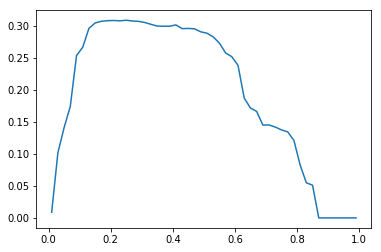

best threshold = 0.25
best mcc = 0.3084398093131567
>>Execution Time -> 0:01


In [14]:
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline

start = datetime.now()

thresholds = np.linspace(0.01,0.99,50)
y_pred = clf.best_estimator_.predict_proba(X_test.values)[:,1]
mcc = np.array([metrics.matthews_corrcoef(y_test.values, y_pred>thr) for thr in thresholds])
plt.plot(thresholds, mcc)
plt.show()

best_thr = thresholds[mcc.argmax()]
print("best threshold = {}".format(best_thr))
print("best mcc = {}".format(mcc.max()))

delta = int((datetime.now() - start).total_seconds())
print(">>Execution Time -> {}:{:02}".format(int(delta/60), int(delta % 60)))

In [15]:
start = datetime.now()
clf_all = lgb.LGBMClassifier(random_state=1,n_jobs=-1,verbose=2, max_depth=clf.best_params_['max_depth'], num_leaves=clf.best_params_['num_leaves'])
clf_all.fit(X, y.values.ravel())
print(">>Execution Time -> {}:{:02}".format(int(delta/60), int(delta % 60)))

>>Execution Time -> 0:01


In [18]:
start = datetime.now()
reader_test_date = pd.read_csv("../test_date.csv",chunksize=CHUNK_SIZE)
reader_test_num = pd.read_csv("../test_numeric.csv",chunksize=CHUNK_SIZE)

#分割して読み込み
loop = 0
for df_chunk_test_date in reader_test_date:
    df_chunk_test_num = reader_test_num.get_chunk(CHUNK_SIZE)
    
    df_test_chunk = pd.merge(on="Id", left=df_chunk_test_date, right=df_chunk_test_num)
    df_test_id_chunk = df_test_chunk['Id']

    df_date_stations = df_test_chunk.loc[:, stations_top]
    df_date_max = np.max(df_date_stations, axis=1)
    df_date_min = np.min(df_date_stations, axis=1)

    df_test_chunk = df_test_chunk.loc[:, ['L3_S32_D3852', 'L3_S33_D3856', 'L3_S32_D3852', 'L2_S26_D3037']]
    df_test_chunk['max'] = df_date_max
    df_test_chunk['min'] = df_date_min     
   
    
    ##予測
    ary_test_chunk_pred = clf_all.predict_proba(df_test_chunk.values)[:,1]
    y_submit = ary_test_chunk_pred > best_thr

    df_test_chunk_pred = pd.DataFrame({'Id':df_test_id_chunk.values, 'Response':y_submit})
    
    if loop == 0:
        df_test_pred = df_test_chunk_pred
    else:
        df_test_pred = pd.concat([df_test_pred, df_test_chunk_pred])
    
    print("loop : {} / Rows = {}".format(loop, len(df_test_pred.index)))
    
    loop = loop + 1

df_test_pred['Response'] = df_test_pred.Response.astype('bool')
df_test_pred.head()

loop : 0 / Rows = 10000
loop : 1 / Rows = 20000
loop : 2 / Rows = 30000
loop : 3 / Rows = 40000
loop : 4 / Rows = 50000
loop : 5 / Rows = 60000
loop : 6 / Rows = 70000
loop : 7 / Rows = 80000
loop : 8 / Rows = 90000
loop : 9 / Rows = 100000
loop : 10 / Rows = 110000
loop : 11 / Rows = 120000
loop : 12 / Rows = 130000
loop : 13 / Rows = 140000
loop : 14 / Rows = 150000
loop : 15 / Rows = 160000
loop : 16 / Rows = 170000
loop : 17 / Rows = 180000
loop : 18 / Rows = 190000
loop : 19 / Rows = 200000
loop : 20 / Rows = 210000
loop : 21 / Rows = 220000
loop : 22 / Rows = 230000
loop : 23 / Rows = 240000
loop : 24 / Rows = 250000
loop : 25 / Rows = 260000
loop : 26 / Rows = 270000
loop : 27 / Rows = 280000
loop : 28 / Rows = 290000
loop : 29 / Rows = 300000
loop : 30 / Rows = 310000
loop : 31 / Rows = 320000
loop : 32 / Rows = 330000
loop : 33 / Rows = 340000
loop : 34 / Rows = 350000
loop : 35 / Rows = 360000
loop : 36 / Rows = 370000
loop : 37 / Rows = 380000
loop : 38 / Rows = 390000
loop 

,Id,Response
0,1,False
1,2,False
2,3,False
3,5,False
4,8,False


In [19]:
##CSV出力
y_submit = df_test_pred
type(y_submit)
y_submit.to_csv("submit_date_sts.csv", columns=['Id', 'Response'], index=False)

In [20]:
y_submit.Response.sum()

6754